1. Basic Logistic Regression Accuracy: 0.956140350877193
2. L1 Regularization Accuracy: 0.956140350877193
3. L2 Regularization Accuracy: 0.956140350877193
   Coefficients: [[-2.01114779e+00 -1.40368304e-01  1.61027631e-01 -2.75238767e-03
   1.06265384e-01  3.87052898e-01  5.67143058e-01  2.71521129e-01
   1.56571405e-01  2.73533286e-02 -6.04476661e-03 -1.24866825e+00
   1.12990533e-01  8.29180613e-02  1.09740435e-02  4.01923817e-02
   7.55115124e-02  3.19100979e-02  3.37024255e-02  1.13054984e-03
  -1.60502134e+00  3.86651530e-01  6.94977585e-02  2.93874897e-02
   1.93133130e-01  1.14514585e+00  1.46274674e+00  4.94397699e-01
   5.40100594e-01  1.10240473e-01]]
4. Elastic Net Regularization Accuracy: 0.9473684210526315
5. OvR Multiclass Accuracy: 0.956140350877193
6. Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
   Best Model Accuracy: 0.9670329670329672
7. Stratified K-Fold Average Accuracy: 0.9508150908244062
8. Logistic Regression Model Accuracy: 0.956140350877

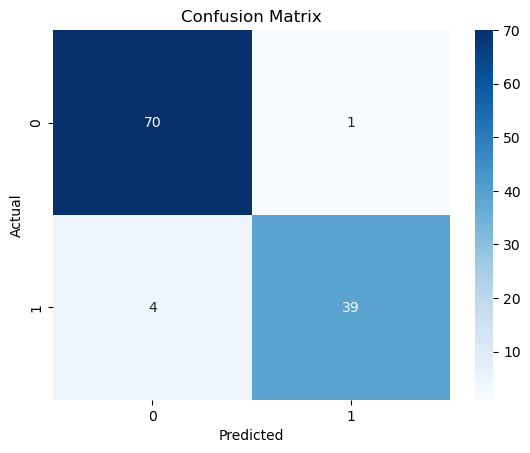

12. Precision: 0.975
    Recall: 0.9069767441860465
    F1-Score: 0.9397590361445783
13. Imbalanced Data Accuracy: 0.9649122807017544
14. Logistic Regression on Titanic Dataset:
   Accuracy  : 0.96
   Precision : 0.97
   Recall    : 0.91
   F1 Score  : 0.94
15. Logistic Regression Accuracy Before and After Feature Scaling:
   Accuracy Without Scaling: 0.9561
   Accuracy With Scaling   : 0.9737
16. ROC AUC Score: 0.9977
17. Accuracy with C=0.5: 0.9561
18. Important Features Based on Coefficients:
 concavity_worst            1.462747
compactness_worst          1.145146
concavity_mean             0.567143
symmetry_worst             0.540101
concave points_worst       0.494398
compactness_mean           0.387053
texture_worst              0.386652
concave points_mean        0.271521
smoothness_worst           0.193133
perimeter_mean             0.161028
symmetry_mean              0.156571
perimeter_se               0.112991
fractal_dimension_worst    0.110240
smoothness_mean            0.1

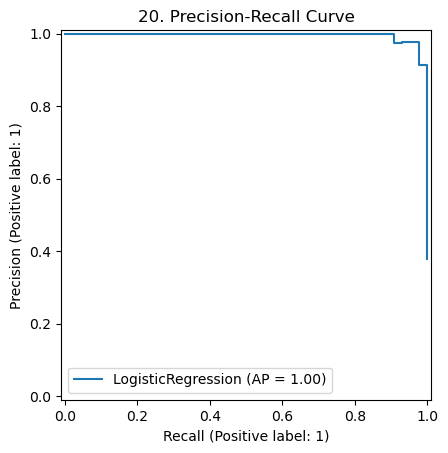

21. Accuracy with solver liblinear: 0.9561
21. Accuracy with solver saga: 0.9561
21. Accuracy with solver lbfgs: 0.9561
22. Matthews Correlation Coefficient (MCC): 0.9068
23. Accuracy on raw data: 0.9561
23. Accuracy on standardized data: 0.9737
24. Best C value: 10.0
24. Best cross-validation accuracy: 0.9626
25. Accuracy after loading model: 0.9561


In [64]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import class_weight
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import matthews_corrcoef
import joblib

# Theoretical Questions

# 1.  What is Logistic Regression, and how does it differ from Linear Regression?
#     * Logistic Regression is a statistical method for binary classification, predicting the probability of a binary outcome. It differs from Linear Regression, which predicts continuous values, by using a sigmoid function to constrain predictions to a 0-1 range, representing probabilities.

# 2.  What is the mathematical equation of Logistic Regression?
#     * The equation for Logistic Regression is: p = 1 / (1 + e**- (β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ)), where p is the probability of the outcome, β₀ is the intercept, β₁, β₂, ..., βₙ are the coefficients, and x₁, x₂, ..., xₙ are the predictor variables.

# 3.  Why do we use the Sigmoid function in Logistic Regression?
#     * We use the Sigmoid function in Logistic Regression because it maps any real-valued number into a value between 0 and 1, which can be interpreted as a probability.

# 4.  What is the cost function of Logistic Regression?
#     * The cost function of Logistic Regression is the Log Loss (or Cross-Entropy Loss), which measures the model's prediction error.

# 5.  What is Regularization in Logistic Regression? Why is it needed?
#     * Regularization in Logistic Regression is a technique to prevent overfitting by adding a penalty term to the cost function. It is needed to reduce model complexity and improve generalization performance.

# 6.  Explain the difference between Lasso, Ridge, and Elastic Net regression.
#     * Lasso (L1) adds the absolute values of coefficients to the penalty term, potentially shrinking some to zero. Ridge (L2) adds the squared values, shrinking coefficients towards zero. Elastic Net combines both L1 and L2 penalties.

# 7.  When should we use Elastic Net instead of Lasso or Ridge?
#     * Elastic Net is preferred when there are many correlated features. It balances the variable selection of Lasso and the coefficient shrinkage of Ridge.

# 8.  What is the impact of the regularization parameter (λ) in Logistic Regression?
#     * The regularization parameter (λ) controls the strength of regularization. A higher λ increases regularization, shrinking coefficients more aggressively, while a lower λ reduces the effect.

# 9.  What are the key assumptions of Logistic Regression?
#     * Key assumptions include: binary or ordinal dependent variable, independence of errors, linearity between independent variables and log-odds, and sufficient sample size.

# 10. What are some alternatives to Logistic Regression for classification tasks?
#     * Alternatives include Decision Trees, Support Vector Machines (SVMs), Naive Bayes, and Neural Networks.

# 11. What are Classification Evaluation Metrics?
#     * Classification evaluation metrics assess model performance, including accuracy, precision, recall, F1-score, and ROC AUC.

# 12. How does class imbalance affect Logistic Regression?
#     * Class imbalance can bias Logistic Regression towards the majority class, reducing performance on the minority class.

# 13. What is Hyperparameter Tuning in Logistic Regression?
#     * Hyperparameter tuning is the process of finding the optimal values for parameters like the regularization strength (C) to improve model performance.

# 14. What are different solvers in Logistic Regression? Which one should be used?
#     * Different solvers optimize the cost function (e.g., 'liblinear', 'lbfgs', 'saga'). The choice depends on dataset size, penalty type, and performance trade-offs.

# 15. How is Logistic Regression extended for multiclass classification?
#     * Logistic Regression is extended for multiclass classification using methods like One-vs-Rest (OvR) or Softmax Regression.

# 16. What are the advantages and disadvantages of Logistic Regression?
#     * Advantages: Simple, efficient, provides probabilities, and interpretable coefficients. Disadvantages: Assumes linearity, limited to classification, and can underperform with complex relationships.

# 17. What are some use cases of Logistic Regression?
#     * Use cases include: spam detection, medical diagnosis, customer churn prediction, and credit risk assessment.

# 18. What is the difference between Softmax Regression and Logistic Regression?
#     * Logistic Regression handles binary classification, while Softmax Regression generalizes it to multiclass classification.

# 19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
#     * OvR trains multiple binary classifiers, while Softmax assigns probabilities to each class. Softmax is preferred when classes are mutually exclusive.

# 20. How do we interpret coefficients in Logistic Regression?
#     * Coefficients in Logistic Regression represent the change in the log-odds of the outcome for a one-unit change in the predictor variable, holding other variables constant.

# Practical Questions

#(Breast Cancer dataset)
df = pd.read_csv("breast_cancer.csv")

X = df.drop(['id', 'diagnosis'], axis=1)  # Features (remove 'id' and target)
y = df['diagnosis'].map({'M': 1, 'B': 0})  # 'M'alignant=1, 'B'eninge=0
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("1. Basic Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

#2.	Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print("2. L1 Regularization Accuracy:", accuracy_score(y_test, y_pred_l1))

#3.	Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print("3. L2 Regularization Accuracy:", accuracy_score(y_test, y_pred_l2))
print("   Coefficients:", model_l2.coef_)

#4.	Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)
print("4. Elastic Net Regularization Accuracy:", accuracy_score(y_test, y_pred_elastic))

#5.	Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear')
model_ovr.fit(X_train, y_train)
y_pred_ovr = model_ovr.predict(X_test)
print("5. OvR Multiclass Accuracy:", accuracy_score(y_test, y_pred_ovr))

#6.	Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['liblinear', 'saga']} 
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("6. Best Parameters:", grid_search.best_params_)
print("   Best Model Accuracy:", grid_search.best_score_)

#7.	Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=stratified_kfold, scoring='accuracy')
print("7. Stratified K-Fold Average Accuracy:", np.mean(cv_scores))


#8.	Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("8. Logistic Regression Model Accuracy:", accuracy)


#9.	Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy
param_distributions = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['liblinear', 'saga']} 
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions, cv=5, n_iter=10, scoring='accuracy')
random_search.fit(X_train, y_train)
print("9. RandomizedSearchCV Best Parameters:", random_search.best_params_)
print("   RandomizedSearchCV Best Model Accuracy:", random_search.best_score_)


#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
ovo_model = OneVsOneClassifier(LogisticRegression(solver='liblinear'))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
print("10. OvO Multiclass Accuracy:", accuracy_score(y_test, y_pred_ovo))

#11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification
model_cm = LogisticRegression(solver='liblinear')
model_cm.fit(X_train, y_train)
y_pred_cm = model_cm.predict(X_test)
cm = confusion_matrix(y_test, y_pred_cm)
print("11. Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score
print("12. Precision:", precision_score(y_test, y_pred_cm))
print("    Recall:", recall_score(y_test, y_pred_cm))
print("    F1-Score:", f1_score(y_test, y_pred_cm))

#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
model_imbalanced = LogisticRegression(class_weight={0: class_weights[0], 1: class_weights[1]}, solver='liblinear')
model_imbalanced.fit(X_train, y_train)
y_pred_imbalanced = model_imbalanced.predict(X_test)
print("13. Imbalanced Data Accuracy:", accuracy_score(y_test, y_pred_imbalanced))

#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print("14. Logistic Regression on Titanic Dataset:")
print(f"   Accuracy  : {accuracy:.2f}")
print(f"   Precision : {precision:.2f}")
print(f"   Recall    : {recall:.2f}")
print(f"   F1 Score  : {f1:.2f}")

#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling
model_no_scaling = LogisticRegression(solver='liblinear')
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression(solver='liblinear')
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

print("15. Logistic Regression Accuracy Before and After Feature Scaling:")
print(f"   Accuracy Without Scaling: {accuracy_no_scaling:.4f}")
print(f"   Accuracy With Scaling   : {accuracy_with_scaling:.4f}")

#16.	Write a Python program to train Logistic Regression and evaluate its performance using ROC AUC score
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"16. ROC AUC Score: {roc_auc:.4f}")

#17.	Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate  accuracy
model_custom_C = LogisticRegression(solver='liblinear', C=0.5)
model_custom_C.fit(X_train, y_train)
y_pred_custom_C = model_custom_C.predict(X_test)
accuracy_custom_C = accuracy_score(y_test, y_pred_custom_C)
print(f"17. Accuracy with C=0.5: {accuracy_custom_C:.4f}")

#18.	Write a Python program to train Logistic Regression and identify important features based on model coefficients
model.fit(X_train, y_train)
feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)
print("18. Important Features Based on Coefficients:\n", feature_importance)

#19.	Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score
y_pred = model.predict(X_test)
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"19. Cohen’s Kappa Score: {cohen_kappa:.4f}")

#20.	Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title("20. Precision-Recall Curve")
plt.show()

#21.	Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model_solver = LogisticRegression(solver=solver, max_iter=500)
    model_solver.fit(X_train, y_train)
    accuracy_solver = accuracy_score(y_test, model_solver.predict(X_test))
    print(f"21. Accuracy with solver {solver}: {accuracy_solver:.4f}")

#22.	Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"22. Matthews Correlation Coefficient (MCC): {mcc:.4f}")

#23.	Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling
model_raw = LogisticRegression(solver='liblinear')
model_raw.fit(X_train, y_train)
accuracy_raw = accuracy_score(y_test, model_raw.predict(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression(solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = accuracy_score(y_test, model_scaled.predict(X_test_scaled))

print(f"23. Accuracy on raw data: {accuracy_raw:.4f}")
print(f"23. Accuracy on standardized data: {accuracy_scaled:.4f}")

#24.	Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation
param_grid = {'C': np.logspace(-3, 3, 7)}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"24. Best C value: {grid_search.best_params_['C']}")
print(f"24. Best cross-validation accuracy: {grid_search.best_score_:.4f}")

#25.	Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

joblib.dump(model, "logistic_model.pkl")
loaded_model = joblib.load("logistic_model.pkl")
y_pred_loaded = loaded_model.predict(X_test)

print(f"25. Accuracy after loading model: {accuracy_score(y_test, y_pred_loaded):.4f}")